In [ ]:
#Author: banafsheh Khazali
#Date: March 04, 2022

In [1]:
# Import required libraries
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Validation data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Testing data classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg    

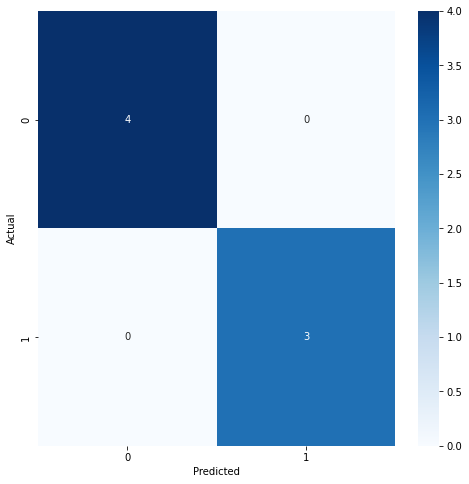

In [4]:
# Set the directory containing the CSV files
directory = "/content/drive/My Drive/Data"

# Define a list to store the data and labels
data = []
labels = []

# Loop through the folders
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        # Get the label (folder name)
        label = folder
        
        # Loop through the CSV files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".csv"):
                # Read the CSV file into a list of lists
                with open(os.path.join(folder_path, filename), "r") as f:
                    lines = f.readlines()
                    # Remove the header line if it exists
                    if lines[0].startswith("time"):
                        lines.pop(0)
                    # Extract the data values from the remaining lines
                    data_values = [list(map(float, line.strip().split(",")[1:])) for line in lines if line.strip().split(",")[0] != "time"]
                # Add the data and label to the lists
                data.append(data_values)
                          
                labels.append(label)

# Pad the sequences to make them the same length
X_padded = pad_sequences(data, padding="post", dtype="float32")

# Convert the data and labels to numpy arrays
X = np.array(X_padded)
y = np.array(labels)

# Flatten the data into a 2D array
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape((n_samples, n_timesteps * n_features))

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_flat, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a gradient boosting classifier and fit it to the training data
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
y_pred_train = clf.predict(X_train)
print("Training data classification report:")
print(classification_report(y_train, y_pred_train))

# Evaluate the classifier on the validation data
y_pred_val = clf.predict(X_val)
print("Validation data classification report:")
print(classification_report(y_val, y_pred_val))

# Evaluate the classifier on the testing data
y_pred_test = clf.predict(X_test)
print("Testing data classification report:")
print(classification_report(y_test, y_pred_test))

# Calculate and plot the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=np.unique(y_train_val), yticklabels=np.unique(y_train_val))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("GB_conf.png")
plt.show()


In [5]:
# Fit the Gradient Boosting Classifier to the training data
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Get the feature importances and sort them in descending order
importances = gb.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Print the top 10 most important features and their importances
print("Top 10 most important features:")
for i in range(10):
    print("%d. Feature %d (%f)" % (i+1, sorted_indices[i], importances[sorted_indices[i]]))


Top 10 most important features:
1. Feature 128008 (0.187809)
2. Feature 48573 (0.151421)
3. Feature 80798 (0.122568)
4. Feature 149188 (0.099459)
5. Feature 141190 (0.080844)
6. Feature 88834 (0.065795)
7. Feature 163075 (0.053598)
8. Feature 71838 (0.043695)
9. Feature 116776 (0.035643)
10. Feature 155674 (0.029089)


In [6]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Get the feature importances and sort them in descending order
importances = gb.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Print the top 10 most important features and their importances
print("Top 10 most important features:")
for i in range(10):
    col_idx = sorted_indices[i] % 280  # get the column index from the sorted feature index
    print("%d. Column %d (%f)" % (i+1, col_idx, importances[sorted_indices[i]]))


Top 10 most important features:
1. Column 48 (0.187809)
2. Column 133 (0.151421)
3. Column 158 (0.122568)
4. Column 228 (0.099459)
5. Column 70 (0.080844)
6. Column 74 (0.065795)
7. Column 115 (0.053598)
8. Column 158 (0.043695)
9. Column 16 (0.035643)
10. Column 274 (0.029089)


In [23]:
# Set the directory containing the CSV files
directory = "/content/drive/My Drive/Data"

# Define a list to store the data and labels
data = []
labels = []

# Loop through the folders
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        # Get the label (folder name)
        label = folder
        
        # Loop through the CSV files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".csv"):
                # Read the CSV file into a list of lists
                with open(os.path.join(folder_path, filename), "r") as f:
                    lines = f.readlines()
                    # Remove the header line if it exists
                    if lines[0].startswith("time"):
                        lines.pop(0)
                    # Extract the data values from the remaining lines
                    data_values = [list(map(float, line.strip().split(",")[1:])) for line in lines if line.strip().split(",")[0] != "time"]
                # Add the data and label to the lists
                data.append(data_values)
                          
                labels.append(label)

# Pad the sequences to make them the same length
X_padded = pad_sequences(data, padding="post", dtype="float32")

# Convert the data and labels to numpy arrays
X = np.array(X_padded)
y = np.array(labels)

# Flatten the data into a 2D array
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape((n_samples, n_timesteps * n_features))

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_flat, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a gradient boosting classifier and fit it to the training data
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get the feature importances and sort them in descending order
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Print the top 10 most important features and their importances
print("Top 10 most important features:")
with open(os.path.join(directory, "0", "syn_0_new600n7.csv"), "r") as f:
    column_names = f.readline().strip().split(",")[1:-1]


for i in range(10):
  feature_idx = sorted_indices[i] % 280 # get the feature index from the sorted index
  col_name = column_names[feature_idx] # get the column name from the feature index
  print("%d. %s (%f)" % (i+1, col_name, importances[sorted_indices[i]]))


Top 10 most important features:
1. RIAL (0.187809)
2. AIYR (0.151421)
3. RIFL (0.122568)
4. VA09 (0.099459)
5. ASGL (0.080844)
6. AWBR (0.065795)
7. AUAR (0.053598)
8. RIFL (0.043695)
9. URBL (0.035643)
10. PHCL (0.029089)


1. RIAL (0.187809)
2. AIYR (0.151421)
3. RIFL (0.122568)
4. VA09 (0.099459)
5. ASGL (0.080844)
6. AWBR (0.065795)
7. AUAR (0.053598)
8. RIFL (0.043695)
9. URBL (0.035643)
10. PHCL (0.029089)


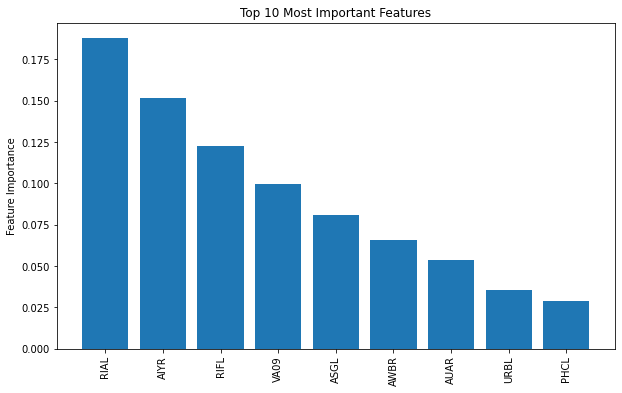

In [24]:
top_cols = []
top_importances = []
for i in range(10):
    col_idx = sorted_indices[i] % 280  # get the column index from the sorted feature index
    col_name = column_names[col_idx]
    importance = importances[sorted_indices[i]]
    top_cols.append(col_name)
    top_importances.append(importance)
    print("%d. %s (%f)" % (i+1, col_name, importance))

# Create a bar plot of the top 10 most important features
plt.figure(figsize=(10,6))
plt.bar(top_cols, top_importances)
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.title("Top 10 Most Important Features")
plt.savefig("GB_features.png")
plt.show()

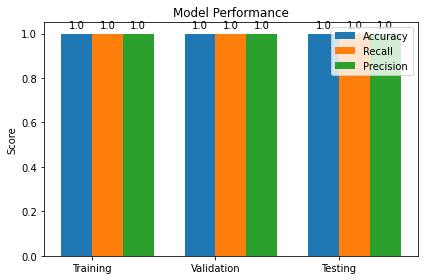

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Define a list to store the data and labels
data = []
labels = []

# Loop through the folders
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        # Get the label (folder name)
        label = folder
        
        # Loop through the CSV files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".csv"):
                # Read the CSV file into a list of lists
                with open(os.path.join(folder_path, filename), "r") as f:
                    lines = f.readlines()
                    # Remove the header line if it exists
                    if lines[0].startswith("time"):
                        lines.pop(0)
                    # Extract the data values from the remaining lines
                    data_values = [list(map(float, line.strip().split(",")[1:])) for line in lines if line.strip().split(",")[0] != "time"]
                # Add the data and label to the lists
                data.append(data_values)
                          
                labels.append(label)

# Pad the sequences to make them the same length
X_padded = pad_sequences(data, padding="post", dtype="float32")

# Convert the data and labels to numpy arrays
X = np.array(X_padded)
y = np.array(labels)

# Flatten the data into a 2D array
n_samples, n_timesteps, n_features = X.shape
X_flat = X.reshape((n_samples, n_timesteps * n_features))

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_flat, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a gradient boosting classifier and fit it to the training data
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the training data
y_pred_train = clf.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train, average='macro')
rec_train = recall_score(y_train, y_pred_train, average='macro')

# Evaluate the classifier on the validation data
y_pred_val = clf.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
prec_val = precision_score(y_val, y_pred_val, average='macro')
rec_val = recall_score(y_val, y_pred_val, average='macro')

# Evaluate the classifier on the testing data
y_pred_test = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test, average='macro')
rec_test = recall_score(y_test, y_pred_test, average='macro')

# Create a table to display the results
data = {'Dataset': ['Training', 'Validation', 'Testing'], 
        'Accuracy': [acc_train, acc_val, acc_test], 
        'Precision': [prec_train, prec_val, prec_test], 
        'Recall': [rec_train, rec_val, rec_test]}
df = pd.DataFrame(data)

# Create a bar plot to display the results

x = np.arange(len(data['Dataset']))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x + width/2, data['Recall'], width, label='Recall')
rects3 = ax.bar(x + width/2 + width, data['Precision'], width, label='Precision')
# Add labels, title and legend

ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(data['Dataset'])
ax.legend()
# Add values on top of the bars

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
    xy=(rect.get_x() + rect.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.savefig("GB_performance.png")
plt.show()

